# Case Study
<H1><u><p style="color:DodgerBlue;">  The goal of this data is to better understand client demographics and purchasing habits. Later this week and, we will employ predictive analytics to examine the most lucrative clients and their interactions. Following that, we will take specific steps to boost lucrative client response, retention, and expansion.</p> </u> </H1>

<img src="IMG_3029.jpg" alt="flowchart of the process"> </img>

# <H1><u> <p style="color:DodgerBlue;">  Getting Data & Importing Neccesary Packages</p> </u> </H1>

In [1]:
import pandas as pd 
import numpy as np  

In [94]:
data = pd.read_csv('marketing_customer_analysis.csv') #Importing CSV file

In [95]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# Show the DataFrame Shape.
data.shape
print("Data Frame Shape =", data.shape)

Data Frame Shape = (10910, 26)


In [5]:
# Display Data Columns 
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
# data.info(10)
# data.describe()
# data.iloc()
# data.sample(3)


<H1><p style="color:DodgerBlue;"> 3 - Cleaning/Wrangling/EDA (Exploratory Data Analysis ) </H1></p> 

In [7]:
# Make header names consistent. Lowercasing all headers to make them more consistent.

In [8]:
# Display Data Columns for checking the difference before applying the function to lower the Data Columns: 
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [9]:
cols = []
for column in data.columns:
    cols.append(column.lower())
data.columns = cols
data.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [10]:
# Eliminating the Unknown Column
data = data.drop(['unnamed: 0'], axis = 1)
data.head(3) # unnamed: 0 has been removed from the DATA TABLE. 

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


<H1><u> <p style="color:DodgerBlue;"> Numerical Features (DATATYPES) </p> </u> </H1>

In [11]:
data.select_dtypes(float) # Showing the Dataframe of the FLOAT numerical columns

,customer lifetime value,months since last claim,number of open complaints,total claim amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [12]:
data.select_dtypes(int) # Showing the Dataframe of the INTEGER numerical columns

,income,monthly premium auto,months since policy inception,number of policies
0,48029,61,52,9
1,0,64,26,1
2,22139,100,31,2
3,49078,97,3,2
4,23675,117,31,7
...,...,...,...,...
10905,0,253,40,7
10906,61146,65,68,6
10907,39837,201,63,2
10908,64195,158,27,6


<H1><u> <p style="color:DodgerBlue;"> Categorical Features (DATATYPES) </p> </u> </H1>

In [13]:
x = data.select_dtypes(object) # Categorical data types
x.head(10)


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
5,HO81102,NaN,NaN,Basic,High School or Below,2/14/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,A
6,IW72280,California,No,Basic,Doctor,2/14/11,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,NaN
7,IH64929,California,No,Basic,High School or Below,2/24/11,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,NaN
8,FM55990,California,Yes,Premium,College,1/19/11,Employed,M,Suburban,Single,Personal Auto,Personal L1,Offer2,Branch,Sports Car,Medsize,NaN
9,QX31376,Oregon,No,Extended,Master,1/4/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Small,NaN


<H1><u> <p style="color:DodgerBlue;"> Deal with NaN values.</p> </u> </H1>

In [14]:
data.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [15]:
# Checking the Null Percentage in the DATA. 

null = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
null = null.reset_index()
null.columns = ['header_name', 'nulls_in_%']
display(null)




,header_name,nulls_in_%
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [16]:
# Because vehicle type contains the most null values, we chose to go further to find unique values.
# For the remainder of the columns, we don't consider it to be a huge number because it is more than 6%,
# And for the categorical columns, we will replace it with the mode.
# Also, we decide to replace it with the mean where there are numerical columns, 


In [17]:
data['vehicle type'].unique()
data['vehicle type'].value_counts()

A    5428
Name: vehicle type, dtype: int64

In [18]:
data['vehicle type'] = data['vehicle type'].fillna('M')
data.head(10)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M
7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,M
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,M
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,M


In [19]:
mode_m = data['months since last claim'].mode()
data['months since last claim'] = data['months since last claim'].fillna(3)
display(mode_m)


0    3.0
Name: months since last claim, dtype: float64

In [20]:
mode_n = data['number of open complaints'].mode()
data['number of open complaints'] = data['number of open complaints'].fillna(0)
display(mode_n)


0    0.0
Name: number of open complaints, dtype: float64

In [21]:
data['state'].isnull().values.any() # Checking state of null value in State

True

In [22]:
data['state'].unique()
data['state'].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [23]:
data.isna().sum()

customer                           0
state                            631
customer lifetime value            0
response                         631
coverage                           0
education                          0
effective to date                  0
employmentstatus                   0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim            0
months since policy inception      0
number of open complaints          0
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    622
vehicle size                     622
vehicle type                       0
dtype: int64

In [24]:
# REplacing the values for the column "State"

data['state'] = data['state'].fillna('California')
# data['state'].head(10)

In [25]:
# We will replace it with the most common value for category columns. 
data['response'].unique()
data['response'].value_counts()

# replacing values for the column 'response'
data['response'] = data['response'].fillna('No')

In [26]:
# We will replace it with the most common value for category columns.
data['vehicle class'].unique()
data['vehicle class'].value_counts()

# Replacing values for the "vehicle class"

data['vehicle class'] = data['vehicle class'].fillna('Four-Door Car')

data['vehicle size'].unique()
data['vehicle size'].value_counts()

# Replacing values for the "vehicle size"

data['vehicle size'] = data['vehicle size'].fillna('Medsize')

In [27]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

 <H1><u> <p style="color:DodgerBlue;"> Date Time Conversion</p> </u> </H1>

In [28]:
import datetime # Importing the Datetime Packages from Pandas. 

data['effective to date'] = pd.to_datetime(data['effective to date'], errors='coerce')
display(data.head())

data['effective to date'][0]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M


Timestamp('2011-02-18 00:00:00')

In [29]:
data['month'] = pd.DatetimeIndex(data['effective to date']).month
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1


<H1><u> <p style="color:DodgerBlue;">Round 3 (EXPLORATION) </p> </u> </H1>

In [30]:
# show dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

In [31]:
# Describe DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [32]:
# Displaying the head 
data.head(2)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1


In [33]:
import matplotlib.pyplot as plt # Importing the packages for plotting
import seaborn as sns 
%matplotlib inline


In [34]:
data['response'].unique()
data['response'].value_counts()


No     9444
Yes    1466
Name: response, dtype: int64

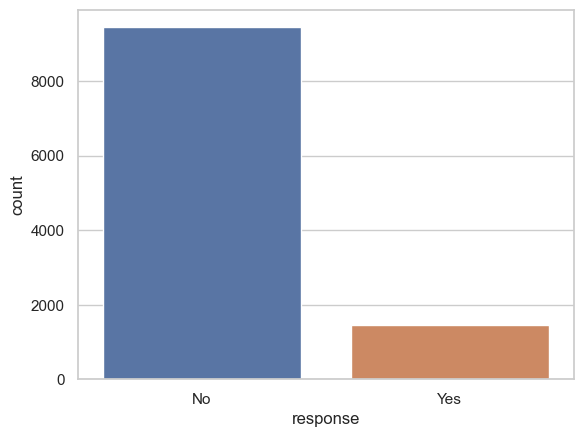

In [35]:
# Countplot of responses
sns.set(style="whitegrid")
ax = sns.countplot(x='response', data=data)
plt.show() 

In [36]:
#creating response rate as a boolean series
data['response rate'] = data['response'] == 'Yes'
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,False
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,False
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,False
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,True
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,False


In [37]:
data['response rate'] =  pd.to_numeric(data['response rate'], errors='coerce')

In [38]:
data.head(10)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,False
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,False
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,False
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,True
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,False
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2,False
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2,False
7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,87197,...,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,M,2,False
8,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,66839,...,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,M,1,True
9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01-04,Employed,F,70961,...,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,M,1,False


In [39]:
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

<AxesSubplot:xlabel='sales channel', ylabel='response rate'>

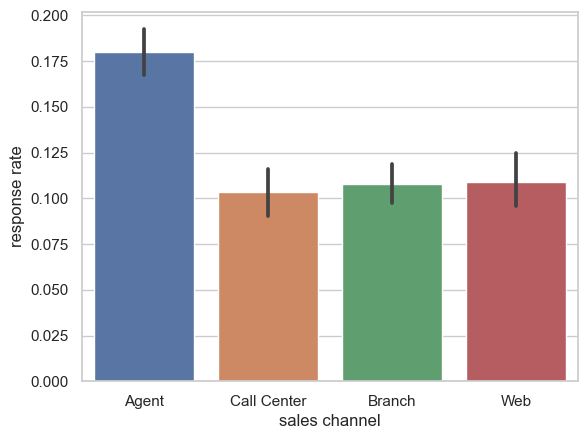

In [40]:
sns.barplot(x ='sales channel', y ='response rate', data = data)

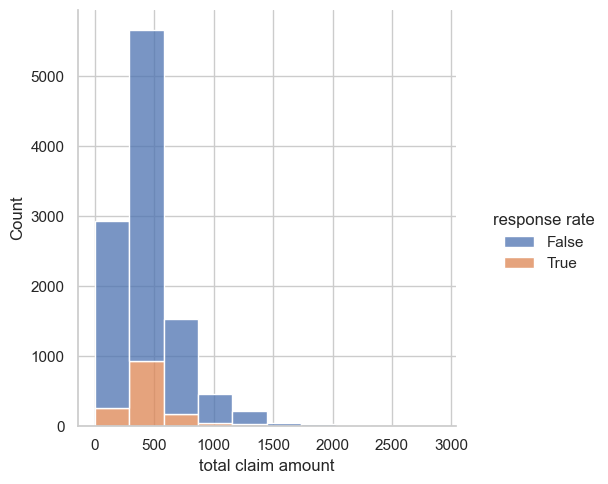

In [41]:
sns.displot(data = data, x ="total claim amount", hue= "response rate", multiple= "stack", bins=10)

In [42]:
# It showing as an Boolean because we didnt force to chnage the Response Rate into int
data["response rate"] = data["response rate"].astype(int)
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,0


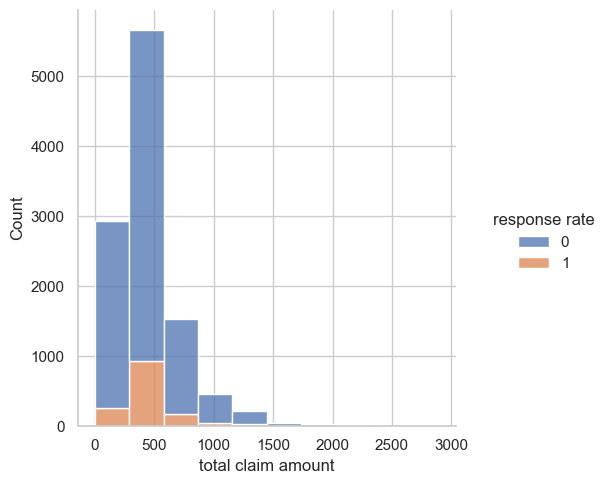

In [43]:
sns.displot(data = data, x ="total claim amount", hue= "response rate", multiple= "stack", bins=10)

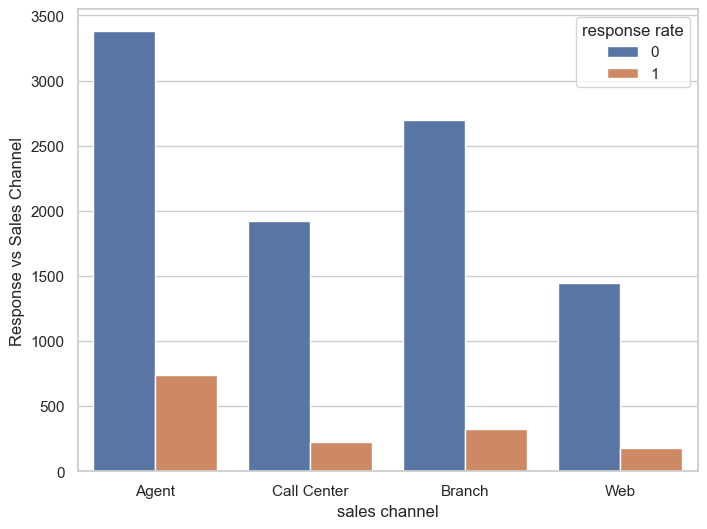

In [44]:
plt.figure(figsize =(8,6))
sns.countplot( data = data, x ='sales channel', hue='response rate')
plt.ylabel('Response vs Sales Channel')
plt.show()

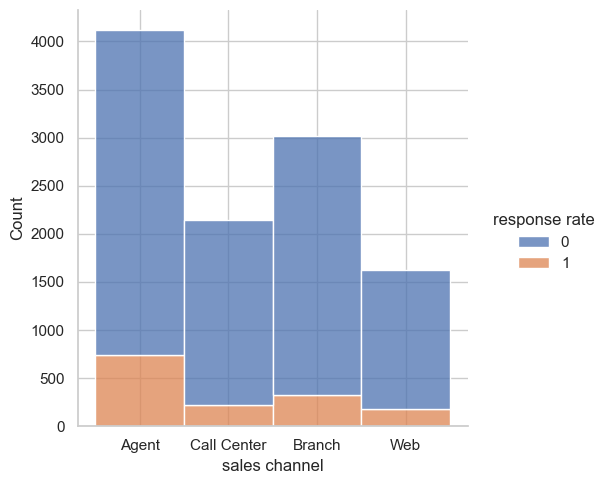

In [45]:
sns.displot( data = data, x ="sales channel", hue="response rate", multiple="stack", bins=10)


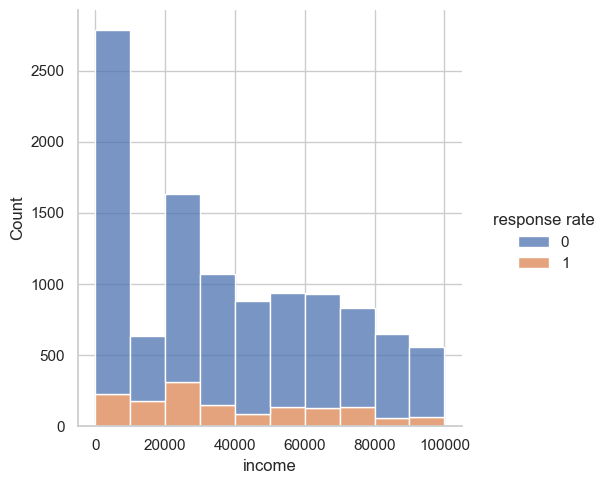

In [46]:
sns.displot( data = data, x ="income", hue="response rate", multiple="stack", bins=10)


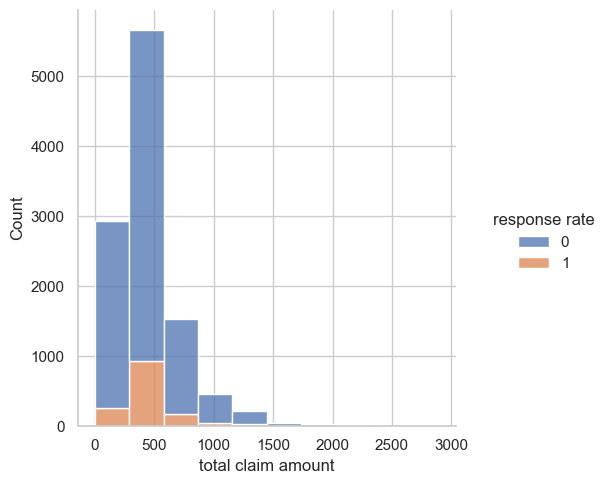

In [47]:
sns.displot( data = data, x ="total claim amount", hue="response rate", multiple="stack", bins=10)

<H1><u> <p style="color:DodgerBlue;">Round 4 - Processing Data Numerical & Categorical</p> </u> </H1>

In [48]:
data.head(1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.21696,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,M,2,0


In [49]:
display(data.columns)

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'month',
       'response rate'],
      dtype='object')

In [50]:
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [51]:
numerical = data.select_dtypes(np.number)
numerical.head(10)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645,1,0
5,4745.181764,50549,61,2.0,73,0.0,7,292.800000,2,0
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2,0
7,4956.247235,87197,63,35.0,45,0.0,3,247.402353,2,0
8,5989.773931,66839,154,33.0,24,0.0,1,739.200000,1,1
9,17114.328150,70961,85,19.0,8,0.0,2,408.000000,1,0


In [52]:
# making numerical dataframe
numerical = pd.DataFrame(data.select_dtypes(np.number))
numerical.head(2)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0


In [53]:
# making categorical dataframe
categorical = pd.DataFrame(data.select_dtypes(object))
categorical.head(2)

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M


In [54]:
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2,0
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0


In [55]:
data['vehicle type'].value_counts(dropna=False)

M    5482
A    5428
Name: vehicle type, dtype: int64

In [56]:
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2,0
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0


In [57]:
data['vehicle class'].value_counts(dropna=False)

Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [58]:
data['number of open complaints'].value_counts(dropna=False)


0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [59]:
data['response'].value_counts(dropna=False)

No     9444
Yes    1466
Name: response, dtype: int64

In [60]:
data['months since last claim'].value_counts(dropna=False)

3.0     1059
6.0      394
1.0      386
7.0      378
4.0      373
2.0      368
5.0      355
0.0      354
10.0     346
16.0     333
11.0     331
15.0     323
13.0     320
8.0      315
12.0     307
17.0     299
14.0     299
9.0      277
23.0     276
19.0     276
25.0     269
21.0     267
18.0     257
20.0     254
22.0     246
24.0     237
29.0     234
28.0     227
31.0     221
26.0     211
27.0     208
30.0     201
34.0     199
33.0     198
35.0     157
32.0     155
Name: months since last claim, dtype: int64

In [61]:
# Lets search for any duplicate values in the Data. 
duplicate = data[data.duplicated()]
print(len(duplicate))

214


In [62]:
numerical.describe().T
summary = numerical.describe().T

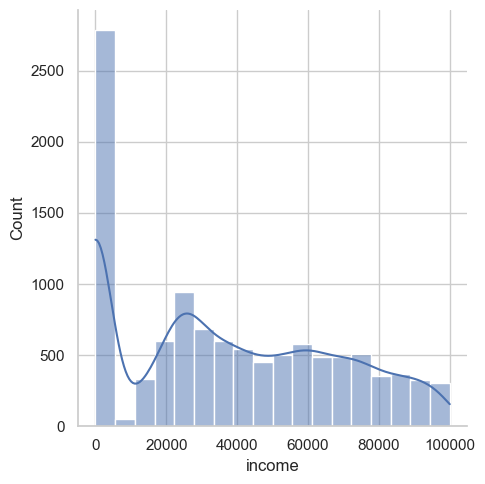

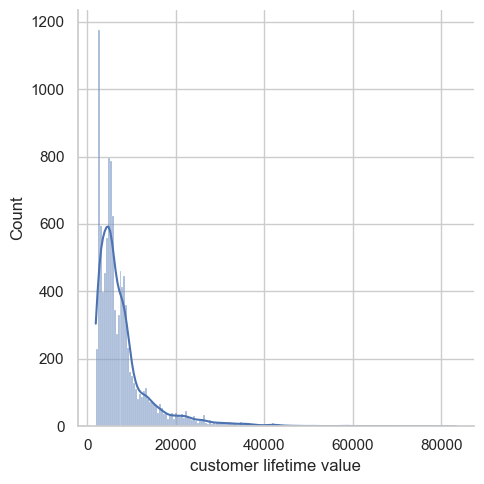

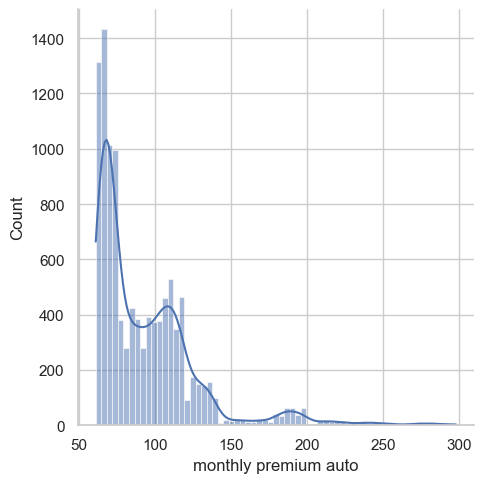

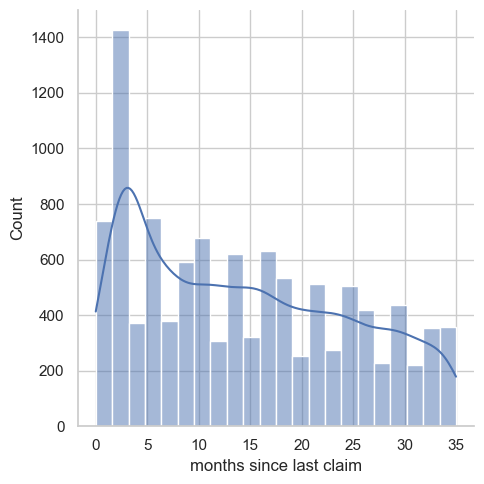

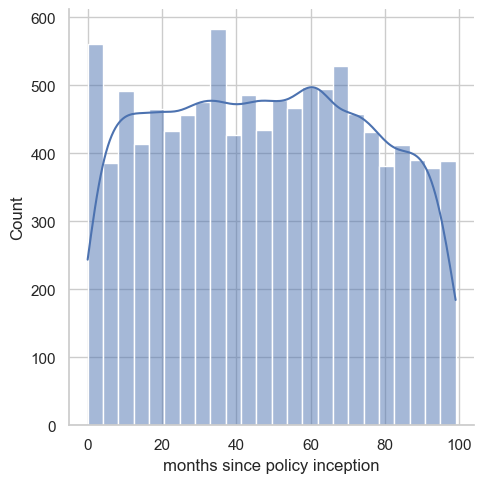

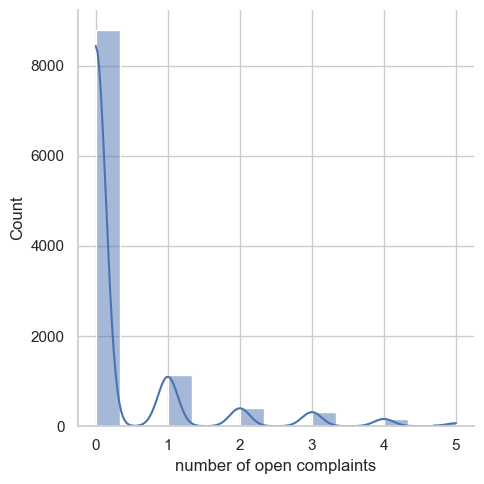

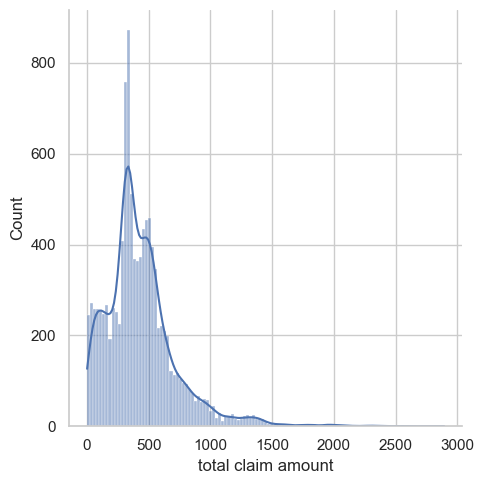

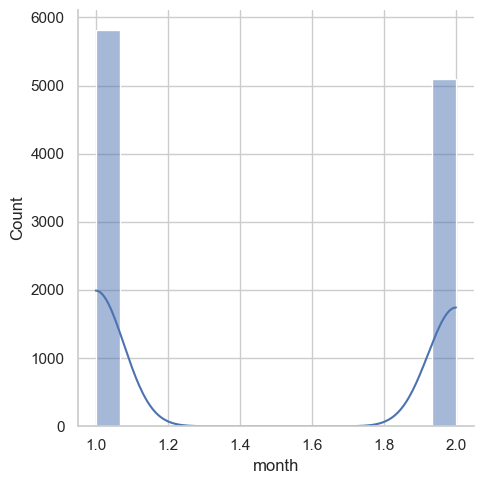

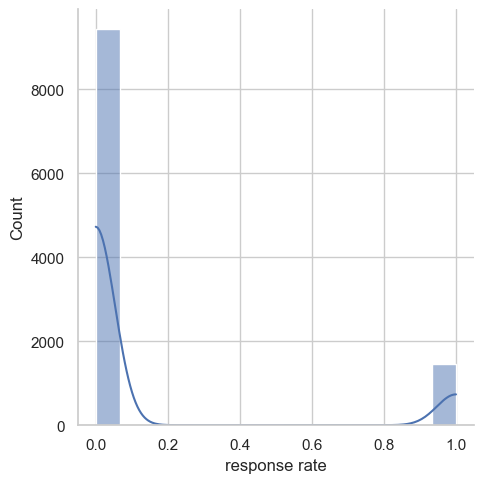

In [63]:
sns.displot(numerical['income'], kde =True)
plt.show()
sns.displot(numerical['customer lifetime value'], kde =True)
plt.show()
sns.displot(numerical['monthly premium auto'], kde =True)
plt.show()
sns.displot(numerical['months since last claim'], kde =True)
plt.show()
sns.displot(numerical['months since policy inception'], kde =True)
plt.show()
sns.displot(numerical['number of open complaints'], kde =True)
plt.show()
sns.displot(numerical['total claim amount'], kde =True)
plt.show()
sns.displot(numerical['month'], kde =True)
plt.show()
sns.displot(numerical['response rate'], kde =True)
plt.show()

In [64]:
numerical


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


In [65]:
# distribution plots for all columns in numerical dataframe
#for i in numerical.columns:
    #print("plotting column", i)
    #sns.displot(x = i, data = numerical)
    #plt.show()

plotting column customer lifetime value


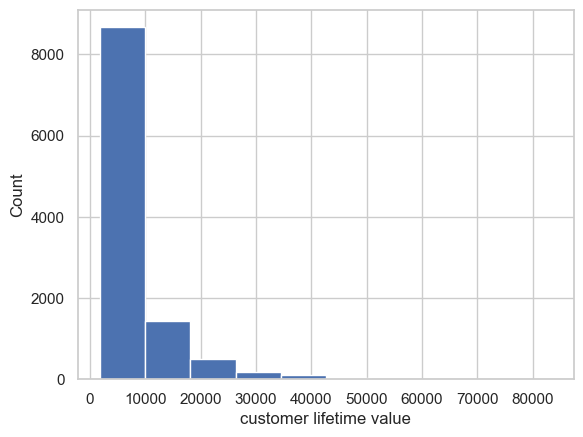

plotting column income


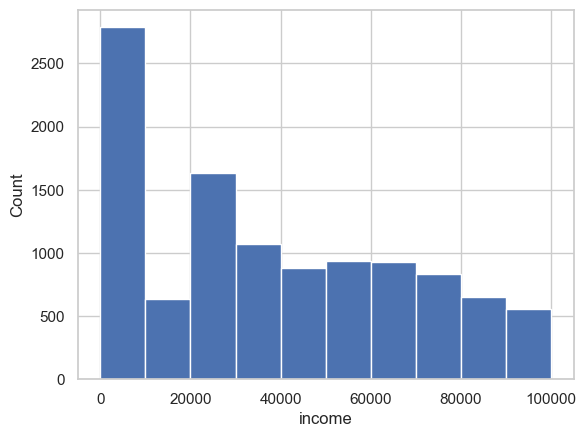

plotting column monthly premium auto


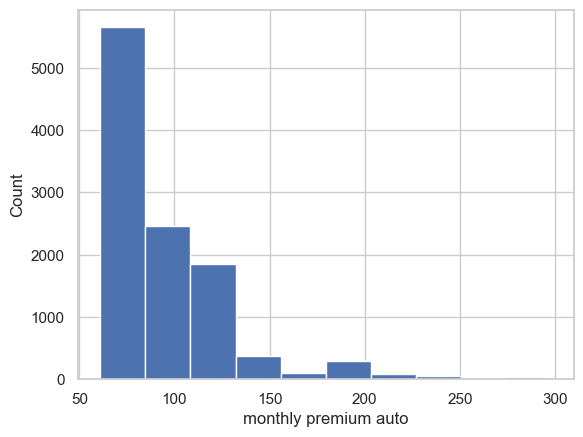

plotting column months since last claim


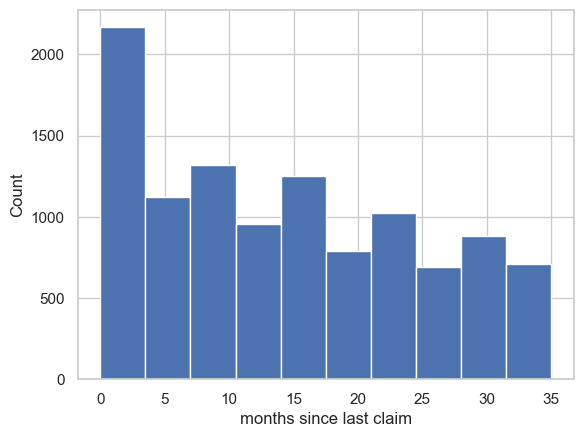

plotting column months since policy inception


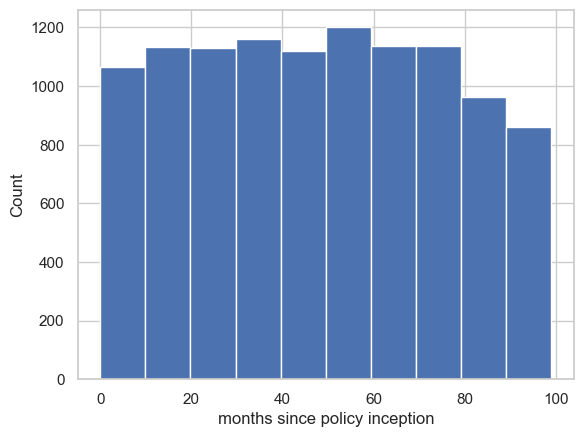

plotting column number of open complaints


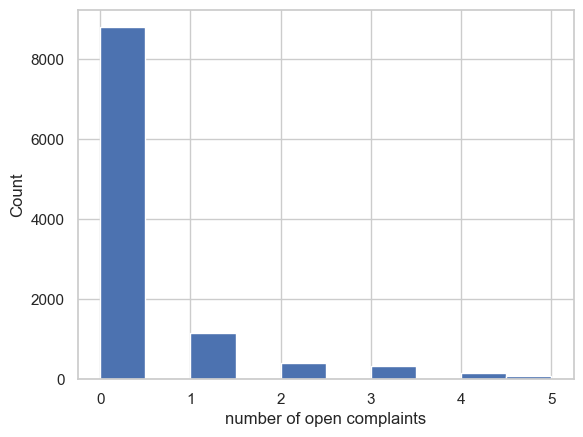

plotting column number of policies


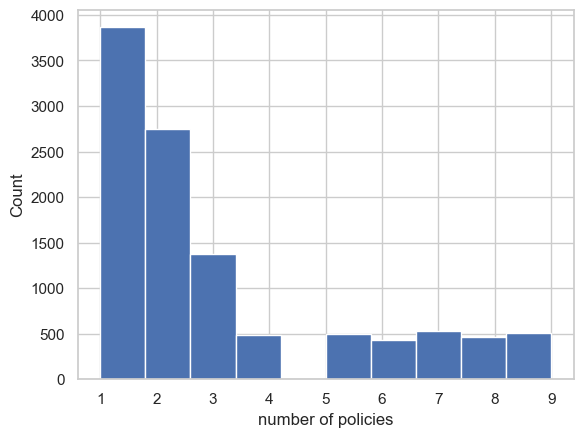

plotting column total claim amount


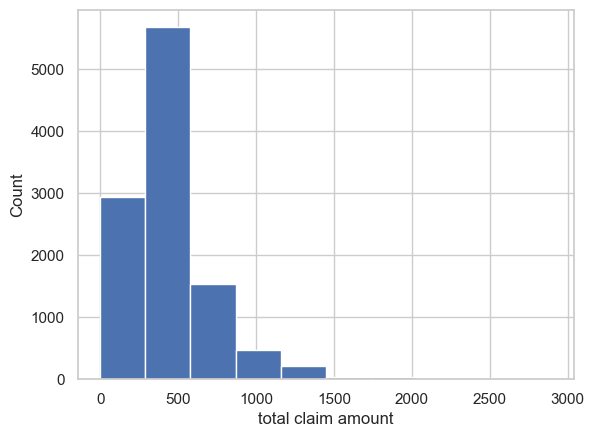

plotting column month


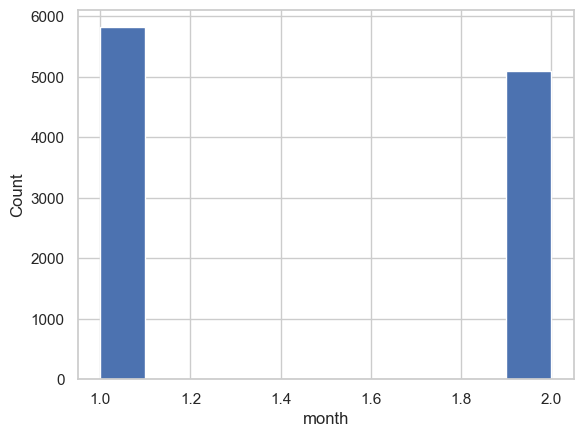

plotting column response rate


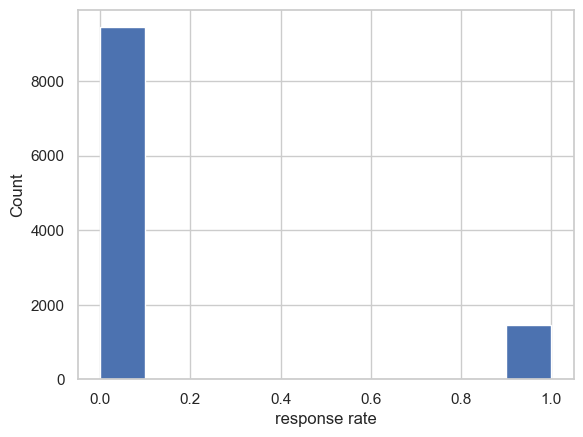

In [66]:
# displaying histogram for every column in numerical
for i in numerical.columns:
    print("plotting column", i)
    plt.hist(x = data[i], density = False)  # density=False would make counts
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.show()

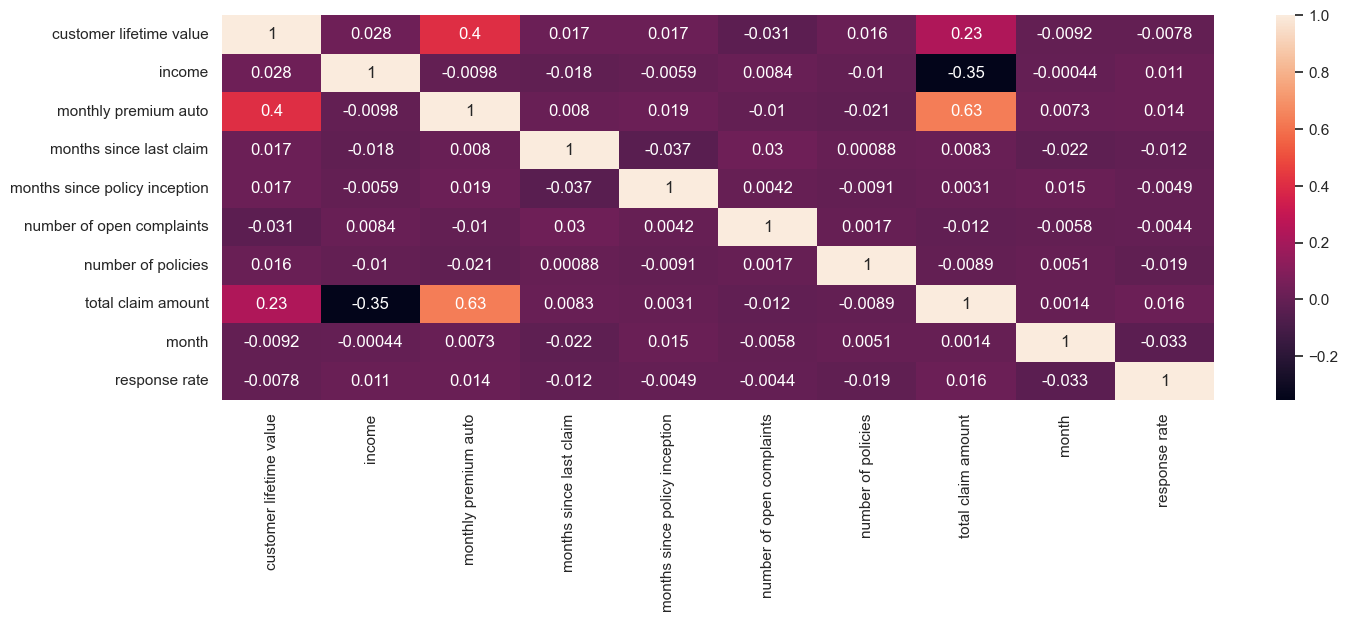

In [67]:
# displaying heatmap and the matrix of the collinearity (?) between the columns.
# rounding dataframe before displaying
correlations_matrix = data.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [68]:
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
customer lifetime value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156
monthly premium auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918
months since last claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,0.008327,-0.021782,-0.012378
months since policy inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875
number of open complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419
number of policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650
total claim amount,0.232626,-0.354141,0.631799,0.008327,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416
month,-0.009234,-0.000443,0.007253,-0.021782,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981
response rate,-0.007765,0.011156,0.013918,-0.012378,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000


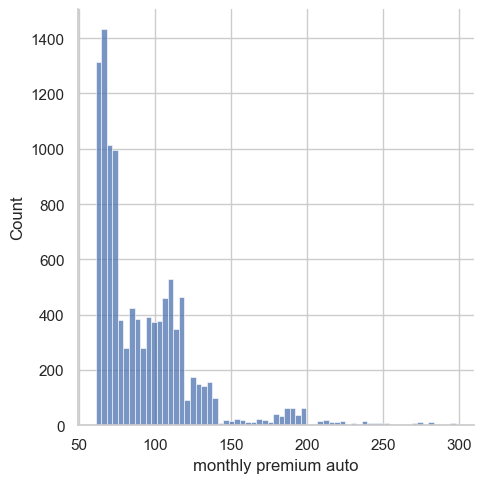

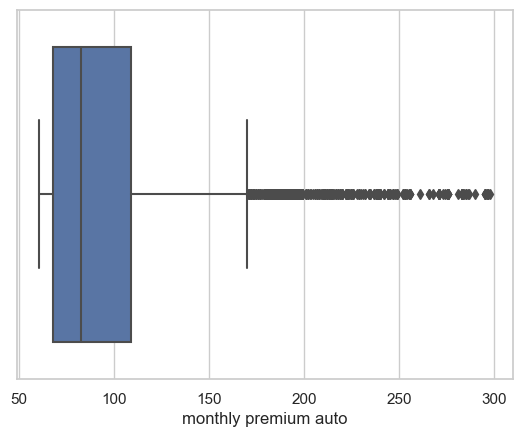

In [69]:
# CHECKING FOR OUTLIERS
sns.displot(numerical['monthly premium auto'])
plt.show()
sns.boxplot(x = numerical['monthly premium auto'])
plt.show()

<H1><u> <p style="color:DodgerBlue;">Round 5 </p> </u> </H1>

In [70]:
# importing
from sklearn.preprocessing import MinMaxScaler


In [71]:
# defining the y and X
y = data['total claim amount']
X = data.drop(['total claim amount'], axis=1)

In [72]:
# just checking both dataframes real quick
display(numerical.head(1))

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,4809.21696,48029,61,7.0,52,0.0,9,292.8,2,0


In [73]:
display(categorical.head(1))

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M


In [74]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
# making tool called transformer by fitting the numerical dataframe into the funct MinMaxScaler()
transformer = MinMaxScaler().fit(numerical)
# producing the "normalized" value, but dont produce the dataframe/series/list (yet)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
# it needs to be made a dataframe first to see it in a better manner
x_normalized = pd.DataFrame(x_normalized, columns=numerical.columns)

(10910, 10)


In [75]:
# now we make the corellation dataframe for all the columns
# WE DONT NEED THIS ANYWHERE ELSE
data_corr = pd.DataFrame(x_normalized, columns=numerical.columns).corr()
# and round it a bit

<H1><u> <p style="color:DodgerBlue;">Round 6 </p> </u> </H1>

In [76]:
from sklearn.preprocessing import OneHotEncoder
# making a mold for the onehot-function 
encoder = OneHotEncoder().fit(categorical)

In [77]:
# looking for duplicates
duplicate = data[data.duplicated()]
print(len(duplicate))
# dropping duplicates, then check again to make sure
data = data.drop_duplicates()
duplicate = data[data.duplicated()]
display(duplicate)
print(len(duplicate))

214


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate


0


In [78]:
# encoder = OneHotEncoder(drop='first').fit(categorical)
encoder = OneHotEncoder().fit(categorical)
cat_encoded = encoder.transform(categorical).toarray()
cols = encoder.get_feature_names_out(input_features=categorical.columns)
onehot_encoded = pd.DataFrame(cat_encoded,columns=cols)
onehot_encoded.head(1)

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,vehicle type_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
# combining again our normalized numerical AND our encoded categorical. cool
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.head(1)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate,...,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,vehicle type_M
0,0.035752,0.480381,0.0,0.2,0.525253,0.0,1.0,0.101171,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [80]:
y1 = X["total claim amount"]
X1 = X.drop(["total claim amount"], axis = 1)

In [81]:
# separating y and X to train and test the machine (?)
y1 = X["total claim amount"]
X1 = X.drop(["total claim amount"], axis = 1)

In [ ]:
# making test data and train data from our predefined X-Matrix and y-column
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# train_list1 = []
# r2_list1 = []
# mse_list1 = []
# rmse_list1 = []
# mae_list1 = []
# testsize1 = []
# bigger1 = []

# # calculating for different test_size values
# for i in range(1,10,1):

#     X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=i/10, random_state=42)
#     testsize1.append(i/10)

#     # preparing linear model function and make a mold from the training + test data
#     from sklearn import linear_model
#     lm = linear_model.LinearRegression()
#     lm.fit(X_train1,y_train1)

#     # calculating R2 from training data
#     predictions1 = lm.predict(X_train1)
#     r2_train1 = r2_score(y_train1, predictions1)
#     train_list1.append(r2_train1)

#     # calculating R2 from test data
#     predictions_test1 = lm.predict(X_test1)
#     r2_1 = r2_score(y_test1, predictions_test1)
#     r2_list1.append(r2_1)

#     # calculating mean squared error (MSE)
#     from sklearn.metrics import mean_squared_error
#     mse1=mean_squared_error(y_test1,predictions_test1)
#     mse_list1.append(mse1)

#     # calculating root mean squared error (RMSE)
#     rmse1 = np.sqrt(mean_squared_error(y_test1,predictions_test1))
#     rmse_list1.append(rmse1)

#     # calculating MAE 
#     from sklearn.metrics import mean_absolute_error
#     mae1 = mean_absolute_error(y_test1, predictions_test1)
#     mae_list1.append(mae1)

#     # bigger or smaller
#     if r2_train1 < r2_1:
#         bigger = "train < test"
#     elif r2_train1 > r2_1:
#         bigger = "train > test"
#     else:
#         bigger = "train = test"
#     bigger1.append(bigger)


# print("\n\nComparison of the R2_train and R2_test for different test sizes.")
# compare1 = pd.DataFrame()
# compare1["test_size"] = pd.DataFrame(testsize1)
# compare1["r2_train"] = pd.DataFrame(train_list1)
# compare1["r2_test"] = pd.DataFrame(r2_list1)
# compare1["comparison"] = pd.DataFrame(bigger1)
# display(compare1)

# # displaying the metrics stuffs in table manner
# print("Metrics results")
# metrics1 = pd.DataFrame()
# metrics1["test_size"] = pd.DataFrame(testsize1)
# metrics1["MSE"] = pd.DataFrame(mse_list1)
# metrics1["RMSE"] = pd.DataFrame(rmse_list1)
# metrics1["MAE"] = pd.DataFrame(mae_list1)
# display(metrics1)
# print("MSE: mean squared error\nMSE: root mean squared error\nMAE: mean absolute error")

<H1><u> <p style="color:DodgerBlue;">Round 7 </p> </u> </H1>

In [82]:
# defining numerical and categorical for the 2nd attempt
numerical2 = pd.DataFrame(data.select_dtypes(np.number))
categorical2 = pd.DataFrame(data.select_dtypes(object))

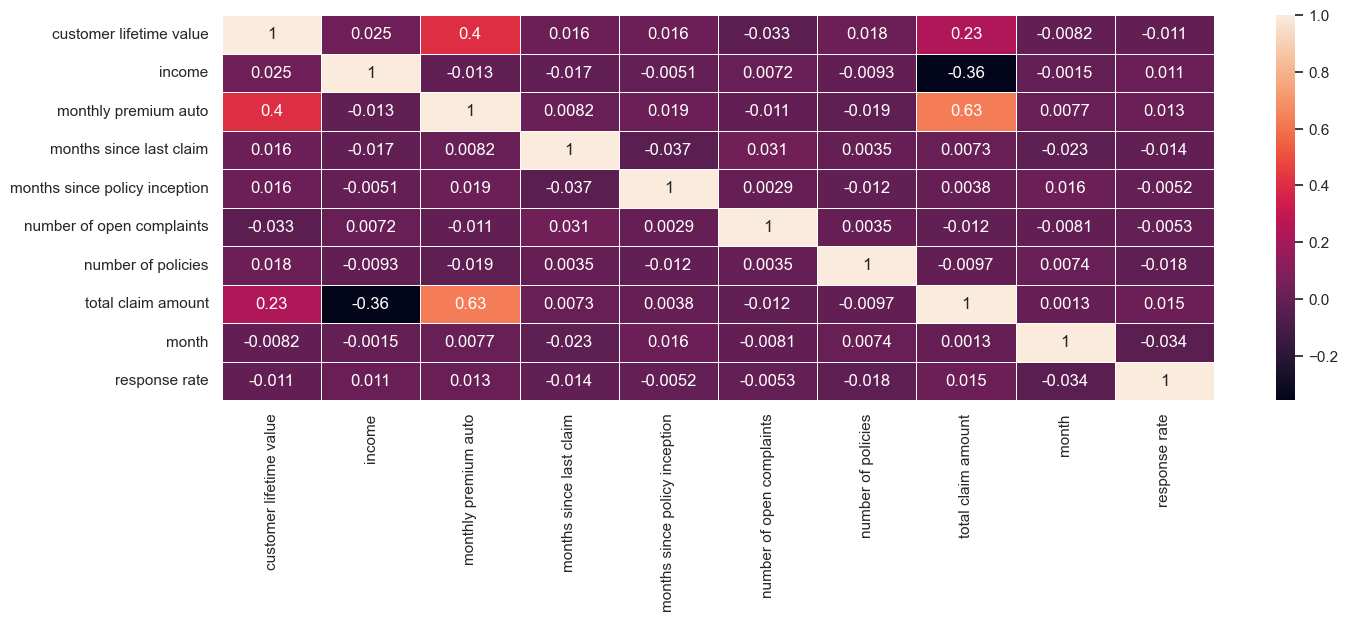

In [83]:
correlations_matrix2 = numerical2.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix2, annot=True, linewidth = .5)
plt.show()

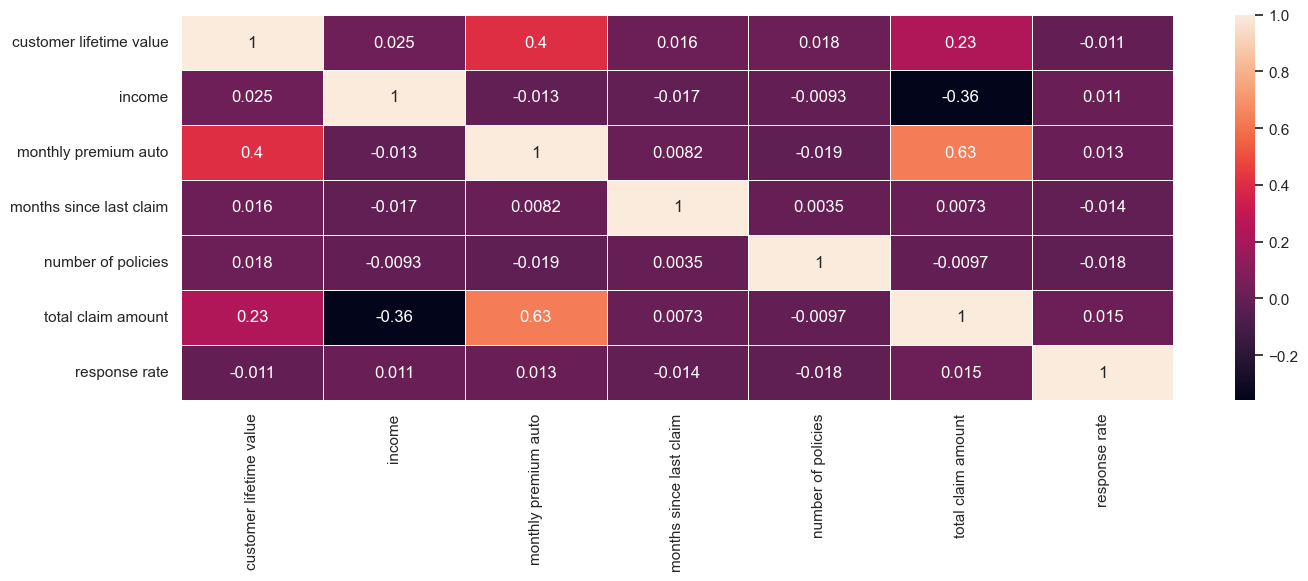

In [86]:
correlations_matrix2 = numerical2.corr()
# display(correlations_matrix)
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix2, annot=True, linewidth = .5)
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler
transformer2 = StandardScaler().fit(numerical2)
x_standardized2 = transformer2.transform(numerical2)
print(x_standardized2.shape)
x_standardized2 = pd.DataFrame(x_standardized2, columns=numerical2.columns)


(10696, 7)


In [88]:
encoder2 = OneHotEncoder().fit(categorical2)
print(encoder2.categories_)
cat_encoded2 = encoder2.transform(categorical2).toarray()
print(cat_encoded2)
cols2 = encoder2.get_feature_names_out(input_features=categorical2.columns)
onehot_encoded2 = pd.DataFrame(cat_encoded2,columns=cols2)
onehot_encoded2.head(5)

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
       'ZZ97035'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,vehicle type_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [89]:
X2 = pd.concat([x_standardized2, onehot_encoded2], axis=1)
X2.head(1)

,customer lifetime value,income,monthly premium auto,months since last claim,number of policies,total claim amount,response rate,customer_AA10041,customer_AA11235,customer_AA16582,...,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,vehicle type_M
0,-0.46602,0.344695,-0.935924,-0.730658,2.519364,-0.487504,-0.396642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [90]:
# dropping irrelevant column(s)
try:
    X2 = X2.drop(columns=["response_num","month"], axis = 1)
except:
    pass
print("deleted columns: 'response_num', 'month' from X")

deleted columns: 'response_num', 'month' from X


In [91]:
# separating y and X to train and test the machine (?)
y2 = X2["total claim amount"]
X2 = X2.drop(["total claim amount"], axis = 1)

In [92]:
# making test data and train data from our predefined X-Matrix and y-column
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# preparing linear model function and make a mold from the training + test data
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train2,y_train2)

LinearRegression()

In [ ]:
making test data and train data from our predefined X-Matrix and y-column
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


train_list2 = []
r2_list2 = []
mse_list2 = []
rmse_list2 = []
mae_list2 = []
testsize2 = []
bigger2 = []

# calculating for different test_size values
for i in range(1,10,1):

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=i/10, random_state=42)
    testsize2.append(i/10)

    # preparing linear model function and make a mold from the training + test data
    from sklearn import linear_model
    lm = linear_model.LinearRegression()
    lm.fit(X_train2,y_train2)

    # calculating R2 from training data
    predictions2 = lm.predict(X_train2)
    r2_train2 = r2_score(y_train2, predictions2)
    train_list2.append(r2_train2)

    # calculating R2 from test data
    predictions_test2 = lm.predict(X_test2)
    r2_2 = r2_score(y_test2, predictions_test2)
    r2_list2.append(r2_2)

    # calculating mean squared error (MSE)
    from sklearn.metrics import mean_squared_error
    mse2=mean_squared_error(y_test2,predictions_test2)
    mse_list2.append(mse2)

    # calculating root mean squared error (RMSE)
    rmse2 = np.sqrt(mean_squared_error(y_test2,predictions_test2))
    rmse_list2.append(rmse2)

    # calculating MAE 
    from sklearn.metrics import mean_absolute_error
    mae2 = mean_absolute_error(y_test2, predictions_test2)
    mae_list2.append(mae2)

    # bigger or smaller
    if r2_train2 < r2_2:
        bigger = "train < test"
    elif r2_train2 > r2_2:
        bigger = "train > test"
    else:
        bigger = "train = test"
    bigger2.append(bigger)

print("\n\nComparison of the R2_train and R2_test for different test sizes.")
compare2 = pd.DataFrame()
compare2["test_size"] = pd.DataFrame(testsize2)
compare2["r2_train"] = pd.DataFrame(train_list2)
compare2["r2_test"] = pd.DataFrame(r2_list2)
compare2["comparison"] = pd.DataFrame(bigger2)
display(compare2)

# displaying the metrics stuffs in table manner

print("Metrics results")
metrics2 = pd.DataFrame()
metrics2["test_size"] = pd.DataFrame(testsize2)
metrics2["MSE"] = pd.DataFrame(mse_list2)
metrics2["RMSE"] = pd.DataFrame(rmse_list2)
metrics2["MAE"] = pd.DataFrame(mae_list2)
display(metrics2)
print("MSE: mean squared error\nMSE: root mean squared error\nMAE: mean absolute error")


# NOTE Round 6 and 7 not completely Understood and took reference:
Will used to it later in the bootcamp. 